In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dubai_apartments = pd.read_json('/content/drive/MyDrive/Projector_traning/dubai_propertyfinder_2024-04-21.json')
dubai_apartments.head()

,id,title,displayAddress,bedrooms,bathrooms,addedOn,verified,priceDuration,propertyType,price,priceCurrency,coordinates,type,sizeMin,furnishing,features,description
0,11272474,Spacious Studio l Pool View l High ROI,"Lincoln Park B, Lincoln Park, Arjan, Dubai",studio,1,2024-03-20T06:06:46Z,True,sell,Apartment,425000,AED,"{'latitude': 25.061007, 'longitude': 55.238113}",Residential for Sale,478 sqft,YES,"[Central A/C, Balcony, Shared Pool, Security, ...",Offering you a spacious Studio apartment avail...
1,11382004,Good Deal | Spacious | High Floor | Must See!,"Al Andalus Tower C, Al Andalus, Jumeirah Golf ...",1,1,2024-04-12T09:42:46Z,True,sell,Apartment,925000,AED,"{'latitude': 25.030499, 'longitude': 55.206486}",Residential for Sale,777 sqft,NO,"[Central A/C, Balcony, Children's Play Area]",Top Class Real Estate gladly offers 1 Bedroom ...
2,11354794,Studio | Q2 26 | 60/40 PP | 2 YRS Post,"Helvetia Residences, Jumeirah Village Circle, ...",studio,1,2024-04-04T06:50:53Z,False,sell,Apartment,690000,AED,"{'latitude': 25.04747, 'longitude': 55.205948}",Residential for Sale,445 sqft,PARTLY,[Balcony],A studio apartment in Helvetia Residences by D...
3,11354795,Studio | Q2 26 | 60/40 PP | 2 YRS Post,"Helvetia Residences, Jumeirah Village Circle, ...",studio,1,2024-04-04T06:50:54Z,False,sell,Apartment,692000,AED,"{'latitude': 25.04747, 'longitude': 55.205948}",Residential for Sale,445 sqft,PARTLY,[Balcony],A studio apartment in Helvetia Residences by D...
4,11191211,Prime Location | Pool View | Modern Furnishing,"Jewelz by Danube, Arjan, Dubai",studio,1,2024-03-06T07:28:28Z,True,sell,Apartment,675000,AED,"{'latitude': 25.064808, 'longitude': 55.24055}",Residential for Sale,422 sqft,YES,"[Central A/C, Shared Pool, Covered Parking, Bu...",Azco Real Estate is thrilled to offer a stunni...


In [3]:
dubai_apartments.shape

(75100, 17)

**Маємо дані про 75100 квартир в Дубаї від 21 квітня 2024 року з сайту:**

**https://www.propertyfinder.ae/en/search?l=1&c=1&t=1&fu=0&ob=mr.**

In [4]:
selected_features = [
    'id',
    'title',
    'displayAddress',
    'bedrooms',
    'bathrooms',
    'addedOn',
    'verified',
    'priceDuration',
    'propertyType',
    'price',
    'priceCurrency',
    'coordinates',
    'type',
    'sizeMin',
    'furnishing',
    'features',
    'description'
]

In [5]:
dubai_apartments = dubai_apartments[selected_features]

In [6]:
missing_values_count = dubai_apartments.isna().sum()
print("Missing values per column:\n", missing_values_count)

Missing values per column:
 id                 0
title              0
displayAddress     0
bedrooms           1
bathrooms         98
addedOn            0
verified           0
priceDuration      0
propertyType       0
price              0
priceCurrency      0
coordinates        0
type               0
sizeMin            0
furnishing         0
features           0
description        0
dtype: int64


Let's investigate features

Lest start from features which should be the same for all entities. They will not be used for boosting but we need to check that they are all identical.

In [7]:
unique_ids_count = dubai_apartments['id'].nunique()
print(f"Number of unique ids: {unique_ids_count}")
assert unique_ids_count == dubai_apartments.shape[0], "All ids are unique"

Number of unique ids: 75100


In [8]:
price_duration_values = dubai_apartments['priceDuration'].value_counts(dropna=False)
print(f"Price Duration: {price_duration_values}")
assert price_duration_values['sell'] == dubai_apartments.shape[0], "All values are the same"

Price Duration: priceDuration
sell    75100
Name: count, dtype: int64


In [9]:
property_type_values = dubai_apartments['propertyType'].value_counts(dropna=False)
print(f"Property type: {property_type_values}")
assert property_type_values['Apartment'] == dubai_apartments.shape[0], "All entities are apartments"

Property type: propertyType
Apartment    75100
Name: count, dtype: int64


In [10]:
price_currency_values = dubai_apartments['priceCurrency'].value_counts(dropna=False)
print(f"Price currency: {price_currency_values}")
assert price_currency_values['AED'] == dubai_apartments.shape[0], "All prices are in AED"

Price currency: priceCurrency
AED    75100
Name: count, dtype: int64


In [11]:
type_values = dubai_apartments['type'].value_counts(dropna=False)
print(f"Type: {type_values}")
assert type_values['Residential for Sale'] == dubai_apartments.shape[0], "All values are the same"

Type: type
Residential for Sale    75100
Name: count, dtype: int64


In [12]:
import matplotlib.pyplot as plt

In [13]:
assert dubai_apartments[dubai_apartments['sizeMin'].str.endswith(' sqft')].shape == dubai_apartments.shape, "All sizes are in sqft"
dubai_apartments['sizeSqft'] = dubai_apartments['sizeMin'].str.replace(' sqft', '').astype(int)
dubai_apartments['sizeSqm'] = dubai_apartments['sizeSqft'] / 10.764

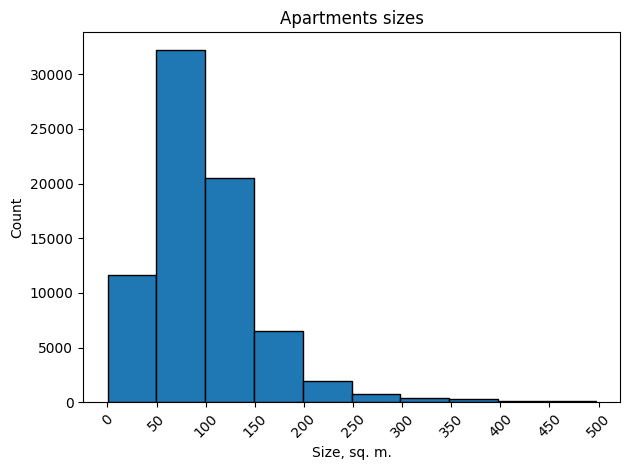

In [14]:
plt.hist(dubai_apartments[dubai_apartments['sizeSqm'] < 500]['sizeSqm'], bins=10, edgecolor='black')
plt.title('Apartments sizes')
plt.xlabel('Size, sq. m.')
plt.ylabel('Count')
plt.xticks(np.linspace(0, 500, 11), rotation=45)
plt.tight_layout()
plt.show()

In [15]:
dubai_apartments['sizeSqft'].sort_values(ascending=True)[:20]

66155      1
47787      1
69821      1
47636     12
47630     12
47377     12
19633     32
16488     34
1743      79
1171      81
17756     83
3012      83
685       84
2582      86
4259      88
920       92
13720     95
40302    100
65216    100
47772    101
Name: sizeSqft, dtype: int64

In [16]:
dubai_apartments['sizeSqm'].sort_values(ascending=False)[:20]

66624    1.313446e+06
66077    3.302042e+05
59491    2.471200e+05
59699    2.471200e+05
62970    2.471200e+05
62963    2.471200e+05
62962    2.471200e+05
62885    2.471200e+05
59735    2.471200e+05
59510    2.471200e+05
63005    2.471200e+05
59780    2.471200e+05
59815    2.471200e+05
38449    2.349182e+05
2913     1.413973e+05
39415    1.370603e+05
44068    1.254181e+05
37377    1.189149e+05
43675    1.111130e+05
12694    8.382284e+04
Name: sizeSqm, dtype: float64

It's seems like there are some unreal sizes but we will filter them by checking unreal prices for 1 sq. m.

**Price**

In [17]:
dubai_apartments['priceUSD'] = dubai_apartments['price'] / 3.672

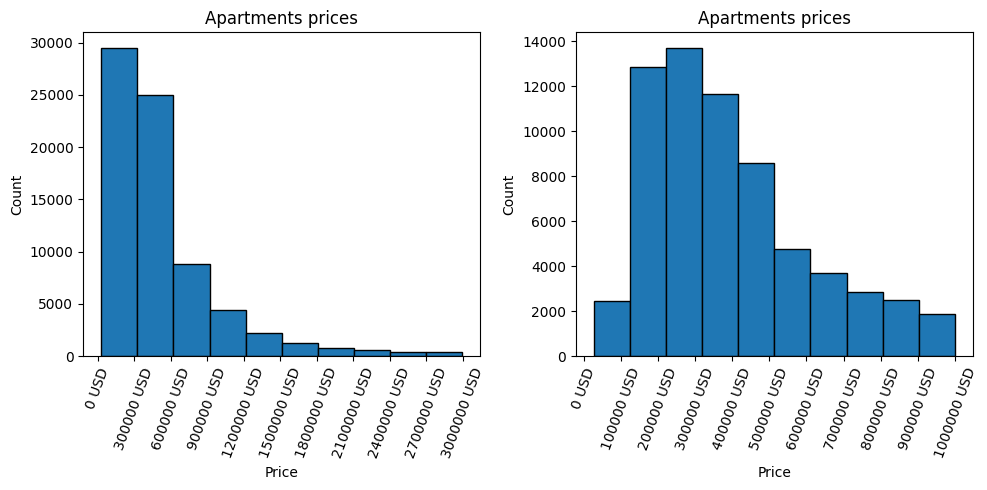

In [18]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(dubai_apartments['priceUSD'][dubai_apartments['priceUSD'] < 3_000_000], bins=10, edgecolor='black')
plt.title('Apartments prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xticks(np.linspace(start=0, stop=3_000_000, num=11), rotation=70)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f USD'))

plt.subplot(1, 2, 2)
plt.hist(dubai_apartments['priceUSD'][dubai_apartments['priceUSD'] < 1_000_000], bins=10, edgecolor='black')
plt.title('Apartments prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xticks(np.linspace(start=0, stop=1_000_000, num=11), rotation=70)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f USD'))

plt.tight_layout()
plt.show()

In [19]:
dubai_apartments['priceUSD'].sort_values(ascending=False)[:20]

60295    2.723312e+08
63172    2.285270e+08
65357    2.042484e+08
65187    1.313998e+08
60284    9.974129e+07
65903    9.556849e+07
62080    6.672113e+07
67839    5.718954e+07
73057    5.582813e+07
65649    5.582789e+07
69791    4.765795e+07
65338    4.765795e+07
51425    4.170752e+07
72247    4.159858e+07
64526    4.159858e+07
52199    4.084967e+07
57721    4.084967e+07
61230    4.084967e+07
65831    3.907952e+07
56186    3.812636e+07
Name: priceUSD, dtype: float64

In [20]:
dubai_apartments['priceUSD'].sort_values(ascending=True)[:50]

9937     27233.115468
14139    27233.115468
14447    27233.115468
14454    27233.115468
14835    27233.115468
14462    27233.115468
14466    27233.115468
14468    27233.115468
14469    27233.115468
9359     27233.115468
10761    27233.115468
15317    27233.115468
15314    27233.115468
15312    27233.115468
15310    27233.115468
15308    27233.115468
15307    27233.115468
11457    27233.115468
14141    27233.115468
9934     27233.115468
14467    27233.115468
9263     27233.115468
9357     27233.115468
9945     27233.115468
9354     27233.115468
9943     27233.115468
9938     27233.115468
9265     27233.115468
9358     27233.115468
9262     27233.115468
14316    27233.115468
14092    29956.427015
14091    29956.427015
14063    29956.427015
14059    29956.427015
16935    34858.387800
17598    37935.729847
16062    38580.882353
15990    38580.882353
13285    42483.660131
6859     43837.690632
307      45315.904139
22165    46405.228758
13284    47712.418301
15933    48366.013072
6847     5

**PRICE per sq. m.:**

In [21]:
dubai_apartments['pricePerSqmUSD'] = dubai_apartments['priceUSD'] / dubai_apartments['sizeSqm']

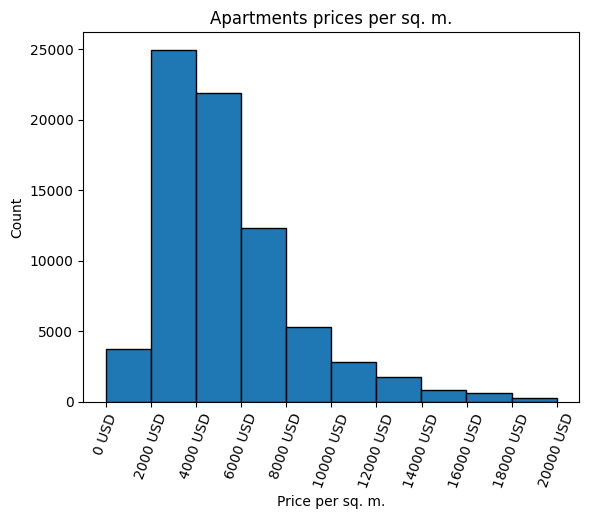

In [22]:
plt.hist(dubai_apartments['pricePerSqmUSD'][dubai_apartments['pricePerSqmUSD'] < 20_000], bins=10, edgecolor='black')
plt.title('Apartments prices per sq. m.')
plt.xlabel('Price per sq. m.')
plt.ylabel('Count')
plt.xticks(np.linspace(start=0, stop=20_000, num=11), rotation=70)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f USD'))

In [23]:
dubai_apartments['pricePerSqmUSD'].sort_values(ascending=False)[:50]

66155    1.137908e+07
69821    6.009314e+06
47787    2.981508e+06
63172    1.918771e+06
65903    8.269286e+05
64077    8.075406e+05
66179    5.366207e+05
74439    4.843914e+05
47636    3.655204e+05
47630    3.611229e+05
47377    3.583532e+05
59506    2.004681e+05
58656    1.650995e+05
52476    1.456803e+05
74427    1.150285e+05
65357    9.818370e+04
73995    7.922629e+04
65548    7.502387e+04
65216    7.108578e+04
74995    6.935837e+04
19633    6.870404e+04
69219    6.630486e+04
60430    6.482262e+04
69811    6.365319e+04
68230    6.102863e+04
68121    6.035179e+04
66825    5.995989e+04
65510    5.853495e+04
70365    5.732802e+04
74992    5.537037e+04
58893    5.367302e+04
63255    5.304509e+04
70714    5.284019e+04
40302    5.232500e+04
74354    5.025210e+04
68884    5.005998e+04
71905    4.976863e+04
55721    4.895821e+04
70616    4.885621e+04
65046    4.885621e+04
67640    4.763480e+04
51501    4.739487e+04
59779    4.645690e+04
64976    4.584967e+04
60089    4.523383e+04
44746    4

In [24]:
dubai_apartments['pricePerSqmUSD'].sort_values(ascending=True)[:50]

66624      1.025278
2913       1.346274
18480      2.224631
38449      2.318519
109        2.345096
66077      2.927811
19054      2.931363
18560      2.931373
43675      2.931373
18745      2.931373
44068      2.931373
16824      2.931373
39415      2.931379
19053      2.931382
12694      3.053872
37377      3.178707
2177       3.222691
13092      4.284314
4841       4.337171
31417      7.315112
72944      9.025952
11457     15.464088
63005     18.096266
59815     18.096266
59699     18.243937
62970     18.243937
62885     18.591073
59735     18.591073
59780     18.646174
59510     18.646174
62963     18.844538
59491     18.844538
62962     19.518974
10796     27.362160
44628     36.642157
15354     37.551211
15359     37.551211
50795     38.406225
42693     39.140129
39929     40.988248
69345     60.006644
41737     71.837290
14316     75.667851
59053     78.482254
70635     91.379871
65646    100.507901
35999    109.592800
31796    109.592800
14835    134.775749
9945     146.862352


In [25]:
dubai_apartments[dubai_apartments['pricePerSqmUSD'] >= 20_000].shape

(718, 21)

In [26]:
dubai_apartments[dubai_apartments['pricePerSqmUSD'] >= 50_000].shape

(36, 21)

In [27]:
dubai_apartments[dubai_apartments['pricePerSqmUSD'] < 1000].shape

(192, 21)

In [28]:
dubai_apartments[dubai_apartments['pricePerSqmUSD'] < 500].shape

(88, 21)

In [29]:
dubai_apartments['pricePerSqmUSD'].quantile(0.001)

346.0888487626455

In [30]:
dubai_apartments['pricePerSqmUSD'].quantile(0.999)

39044.12916616235

Let's remove unreally expensive and cheap apartments

In [31]:
dubai_apartments.shape

(75100, 21)

In [32]:
dubai_apartments = dubai_apartments[(dubai_apartments['pricePerSqmUSD'] >= 500) & (dubai_apartments['pricePerSqmUSD'] <= 50000)]

In [33]:
dubai_apartments.shape

(74976, 21)

In [34]:
bedrooms_values = dubai_apartments['bedrooms'].value_counts(dropna=False)
print(f"Possible bedrooms: {bedrooms_values}")

Possible bedrooms: bedrooms
1         29141
2         24816
studio    11838
3          7779
4          1186
5           174
6            34
7+            4
7             3
None          1
Name: count, dtype: int64


For 'None' and '7+' we will need to find solution. Можна приблизно оцінити виходячи з загальної площі. Or simply drop since there are a very few of them.

In [35]:
dubai_apartments = dubai_apartments[(dubai_apartments['bedrooms'].notnull()) & (dubai_apartments['bedrooms'] != '7+')]
dubai_apartments.loc[dubai_apartments['bedrooms'] == 'studio', 'bedrooms'] = '0'
dubai_apartments['bedrooms'] = dubai_apartments['bedrooms'].astype(int)
dubai_apartments.shape

(74971, 21)

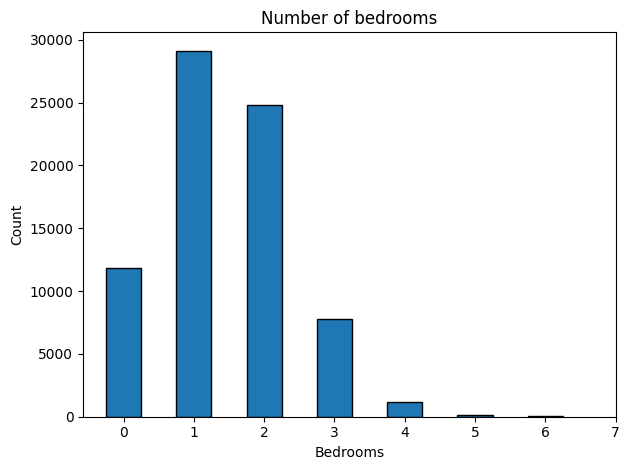

In [36]:
plt.hist(dubai_apartments['bedrooms'], bins=7, align='left', rwidth=0.5, edgecolor='black')
plt.title('Number of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.xticks(np.linspace(0, 7, 8), rotation=0)
plt.tight_layout()
plt.show()

**BATHROOMS:**

In [37]:
bathrooms_values = dubai_apartments['bathrooms'].value_counts(dropna=False)
print(f"Possible bathrooms: {bathrooms_values}")

Possible bathrooms: bathrooms
2       28688
1       21868
3       16978
4        5702
5        1272
6         274
None       96
7          63
none       21
7+          9
Name: count, dtype: int64


For 'None/none' and '7+' we will need to find solution. Можна приблизно оцінити виходячи з загальної площі. Or simply drop since there are a very few of them.

In [38]:
dubai_apartments = dubai_apartments[(dubai_apartments['bathrooms'].notnull()) & (dubai_apartments['bathrooms'] != '7+') & (dubai_apartments['bathrooms'] != 'none')]
dubai_apartments['bathrooms'] = dubai_apartments['bathrooms'].astype(int)
dubai_apartments.shape

<ipython-input-38-3b1f0bf94ac3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dubai_apartments['bathrooms'] = dubai_apartments['bathrooms'].astype(int)


(74845, 21)

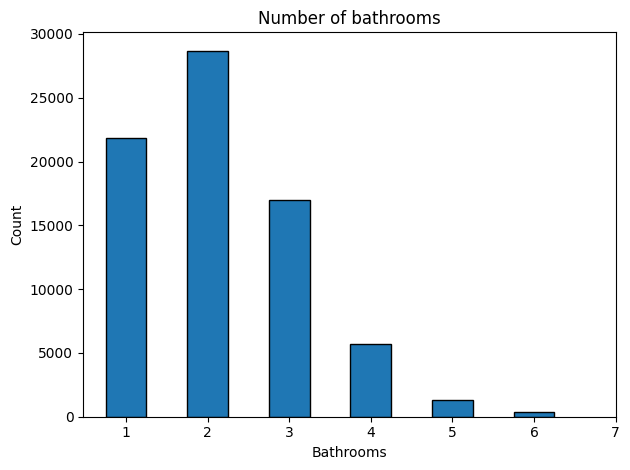

In [39]:
plt.hist(dubai_apartments['bathrooms'], bins=6, align='left', rwidth=0.5, edgecolor='black')
plt.title('Number of bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.xticks(np.linspace(1, 7, 7), rotation=0)
plt.tight_layout()
plt.show()

**VERIFIED:**

In [40]:
verified_values = dubai_apartments['verified'].value_counts(dropna=False)
print(f"Verified: {verified_values}")

Verified: verified
False    54259
True     20586
Name: count, dtype: int64


**FURNISHING:**

In [41]:
furnishing_values = dubai_apartments['furnishing'].value_counts(dropna=False)
print(f"Furnishing values: {furnishing_values}")

Furnishing values: furnishing
NO        38617
YES       23706
PARTLY    12289
            233
Name: count, dtype: int64


**Ad Date**

In [43]:
from datetime import datetime
dubai_apartments['addedDate'] = pd.to_datetime(dubai_apartments['addedOn'])

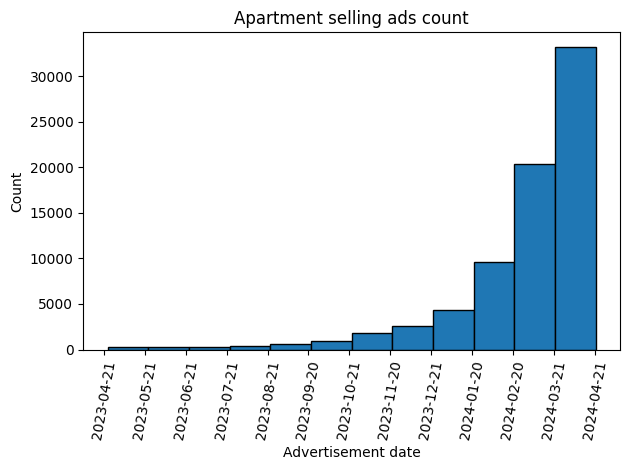

In [44]:
max_date = dubai_apartments['addedDate'].max()
min_date = max_date - pd.DateOffset(years=1)

plt.hist(dubai_apartments['addedDate'][dubai_apartments['addedDate'] > min_date], bins=12, edgecolor='black')
plt.title('Apartment selling ads count')
plt.xlabel('Advertisement date')
plt.ylabel('Count')
plt.xticks(pd.date_range(start=min_date.strftime('%Y-%m-%d'), end=max_date.strftime('%Y-%m-%d'), periods=13), rotation=80)
plt.tight_layout()
plt.show()

So, almost all ads are quite recent.

In [45]:
dubai_apartments['adMonths'] = (max_date - dubai_apartments['addedDate']).dt.days // 30
print(dubai_apartments['adMonths'].value_counts())

adMonths
0     32810
1     20103
2      9860
3      4530
4      2451
5      1924
6      1006
7       613
8       444
11      275
10      252
9       236
12       79
13       63
14       49
15       18
22       15
18       14
17       13
23       12
19       10
24        9
16        8
21        8
26        5
28        4
25        4
20        4
27        4
31        3
33        3
30        3
29        2
41        2
35        2
34        2
37        2
32        1
36        1
39        1
Name: count, dtype: int64


In [46]:
dubai_apartments.to_json('/content/drive/MyDrive/Projector_traning/dubaiApp.json')